In [1]:
%matplotlib inline
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Создание DataFrame

titanic_data = pd.read_csv('train.csv')

In [3]:
# Проверка на наличие нулевых (пропущенных) значений

titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Определяем зависимую переменную (Y - выжил ли пассажир) и независимые переменные (X)
# В качестве зависимых переменных используются класс пассажира (Pclass), пол (Sex), стоимость билета (Fare), 
# возраст пассажира (Age), братья/сестры/супруги на борту(SibSp), дети/родители на борту (Parch),
# порт посадки (Embarked: C = Cherbourg, Q = Queenstown, S = Southampton)

X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
Y = titanic_data.Survived

In [5]:
#В дереве решений все значения, даже качественные, должны быть представленны в виде чисел
#Поэтому данные о поле и порте посадки представляет в виде чисел 0 и 1

X = pd.get_dummies(X)
X.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1


In [6]:
# При реализации дерева решения необходимо позаботиться, чтобы все NaN были заполнены
# Заполняем пропущенные значеняи в колонке возраст(Age) медианным значением

X = X.fillna({'Age': X.Age.median()})
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [7]:
# Создаем дерево решений на основе данных X и Y, критерий - энтропия

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(2445.153917910448, 1325.025, 'Sex_male <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(912.2154850746268, 1257.075, 'Pclass <= 2.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]'),
 Text(353.95522388059703, 1189.125, 'Fare <= 28.856\nentropy = 0.299\nsamples = 170\nvalue = [9, 161]'),
 Text(270.6716417910448, 1121.175, 'Fare <= 28.231\nentropy = 0.469\nsamples = 70\nvalue = [7, 63]'),
 Text(229.02985074626866, 1053.225, 'Age <= 23.5\nentropy = 0.426\nsamples = 69\nvalue = [6, 63]'),
 Text(187.38805970149255, 985.275, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(270.6716417910448, 985.275, 'Age <= 27.5\nentropy = 0.503\nsamples = 54\nvalue = [6, 48]'),
 Text(166.56716417910448, 917.325, 'Age <= 25.5\nentropy = 0.845\nsamples = 11\nvalue = [3, 8]'),
 Text(83.28358208955224, 849.375, 'Fare <= 13.75\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(41.64179104477612, 781.425, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(124.9253731343283

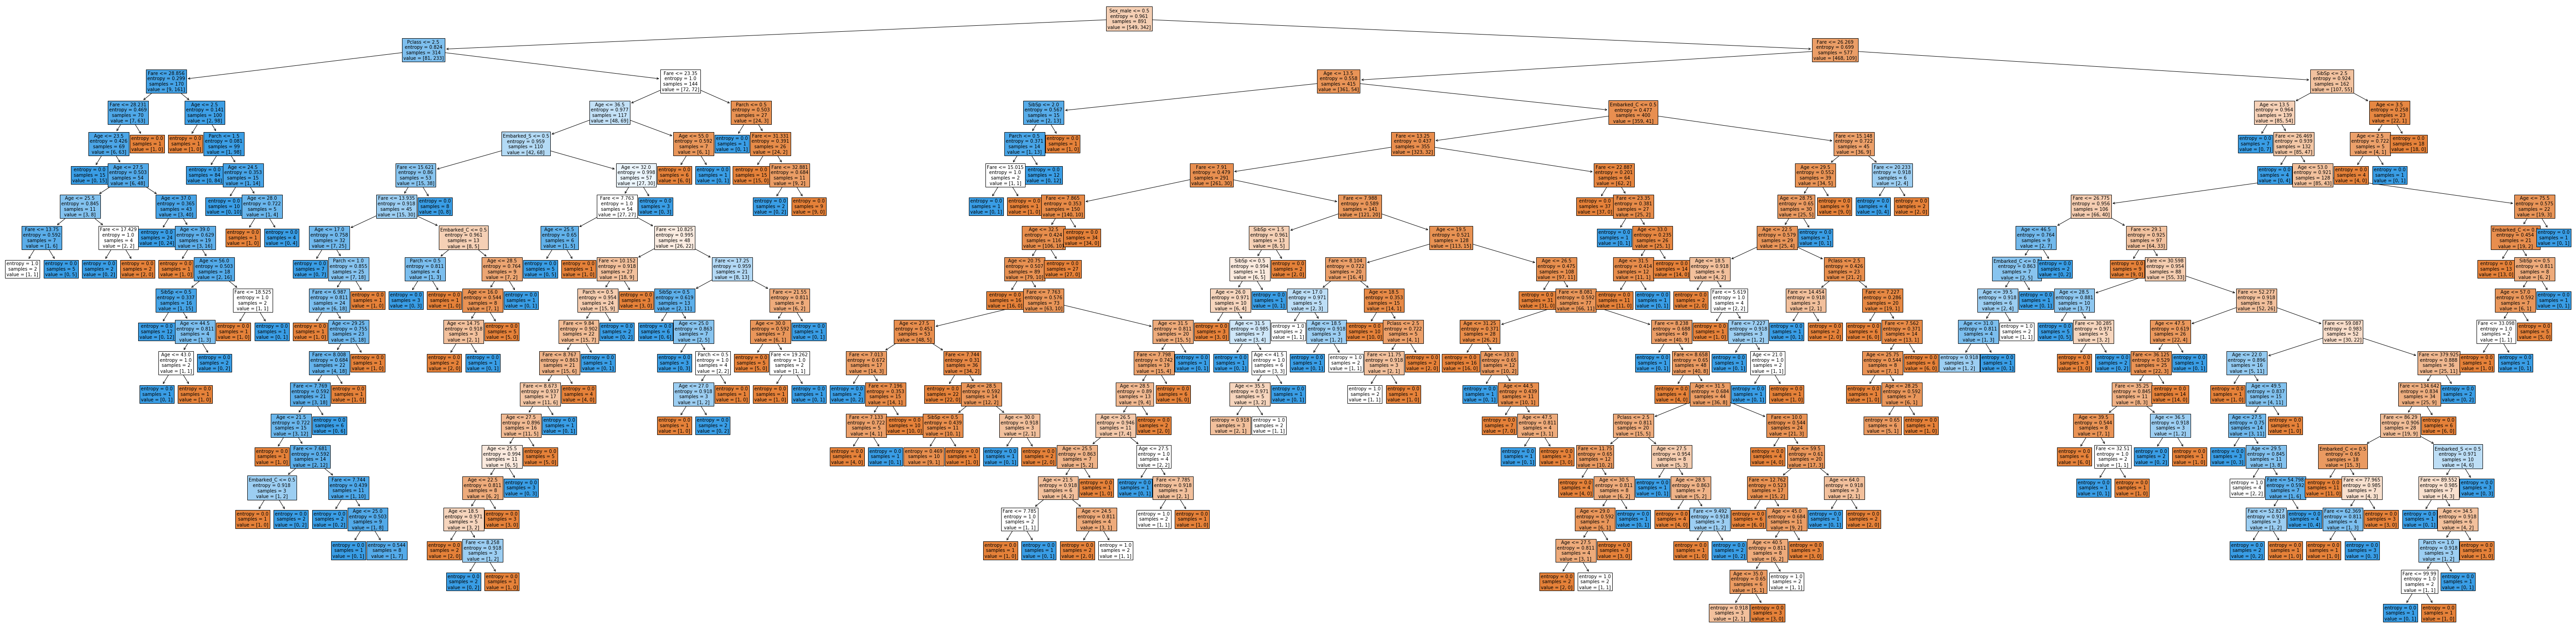

In [8]:
# Определяем размеры дерева решений и визуализируем его

plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)

# В результате дерево получилось переобученным, То есть дерево решает задачу классификации конкретно этих данных, 
# не вычленяя при этом какие-либо закономерности до тех пор, пока энтропия не станет равной 0 или как можно ближе к нему.

In [9]:
# Для решения проблемы переобучения можно варьировать глубину дерева,
# а также необходимо разбить все наши данные на 2 категории:
#     на первой будет происходить обучение модули (train);
#     на второй будет происходить тест дерева

# Разбиение данных на тест и обучение осуществляется с помощью train_test_split

from sklearn.model_selection import train_test_split

In [10]:
# Тестовая выборка будет составлять 33% от общего DF

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.33,
                                                   random_state=42)

In [11]:
# Проверить, насколько хорошо дерево решений предсказывает значение, можно 
# сравнив насколько хорошо наше дерево предсказывает правильные ответы на обучающей выборке(train множестве) 
# и насколько хорошо - на тестовой. Это очень упрощённая версия валидации модели.

clf.score(X, Y)

0.9797979797979798

In [12]:
# Валидация значений на новой выборке, где содержится только train множество

clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9798657718120806

In [13]:
# Проверка правильности предсказания тестовой выборки

clf.score(X_test, y_test)

0.7796610169491526

In [14]:
# Ограничиваем глубину дерева для предсказания закономерностей до 3

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [15]:
# Валидация значений на новом дереве решений с глубиной 3

clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8238255033557047

In [16]:
# Улучшение правильности предсказания
# Здесь нужно обратить внимание на большую разницу в полученных значениях на обучащей и тестовой выборках.
# Большая разница в значениях говорит об overfitting (переобучении)

clf.score(X_test, y_test)

0.8203389830508474

In [17]:
# Рассчитываем оптимальную глубину дерева. Для этого создаем пустой DF, в который
# включаем данные о валидации значений на train и test множествах
# при максимальной глубине дерева от 1 до 100

max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

In [18]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [19]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780


In [20]:
# Изненение формата DF
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                          value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')

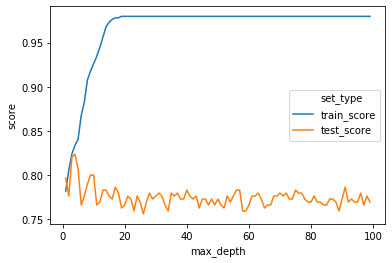

In [21]:
# Построим график изменения train и test score в зависимости от изменения глубины дерева
sns.lineplot(x='max_depth', y='score',
             hue='set_type', data=scores_data_long)

In [22]:
# Анализ графика:
# с увеличеним глубины дерева растет точность классификации на тренировочной выборке;
# но это не всегда ведет к нахождению общих закономерностей исследуемых данных;
# test score изначально невелик(модель еще не доучилась), на промежутке 3-5 score максимален(оптимальное состояние: закономерность с изученных данных переносится на новые), 
# но в дальнейшем с увеличеним train score начинает падать test score(переход от недообученности к переобученности)

In [23]:
# Используем кросс-валидацию для улучшения дерева

from sklearn.model_selection import cross_val_score

In [24]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [25]:
# Работа кросс-валидатора основана на следующем принципе:
#     Множество разбивается на 5 (cv) равных отрезков
#     Обучение происходило сначала на 1-4 с предсказанием 5 значения
#     Затем обучение происходило на 1-3 и 5 с предсказанием 4 значения и тд
# Используем среднее значение кросс-валидации

cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7835799743626264

In [26]:
# С учетом данных изменений рассчитаем оптимальную глубину дерева

max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

In [27]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score], 
                                    'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [28]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.810169,0.805345


In [29]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                          value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

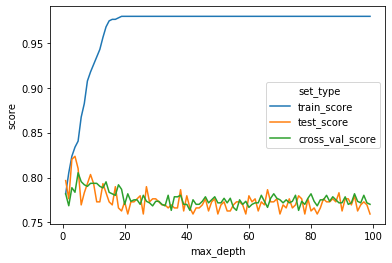

In [30]:
# Построим график изменения train и test score в зависимости от изменения глубины дерева
# с динамикой показателя кросс-валидации

sns.lineplot(x='max_depth', y='score',
             hue='set_type', data=scores_data_long)

In [31]:
# Максимальная точность достигается при большей глубине дерева, чем 3-4
# Сross_val_score более устойчив к переобучению
# Найдем дерево с максимальным значением cross_val_score

scores_data_long.query('set_type == "cross_val_score"').head(15)

,max_depth,set_type,score
198,1,cross_val_score,0.781857
199,2,cross_val_score,0.768553
200,3,cross_val_score,0.788678
201,4,cross_val_score,0.783580
202,5,cross_val_score,0.805345
203,6,cross_val_score,0.795388
204,7,cross_val_score,0.791956
205,8,cross_val_score,0.790190
206,9,cross_val_score,0.793537
207,10,cross_val_score,0.793580


In [34]:
# Максимальное значение cross_val_score достигается при глубине дерева, равном 5
# Создадим новое дерево с max_depth=11

best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [35]:
# Финальная кросс-валидация на тестовых значениях
# Это та максимальная точночность, которую мы получили, обучив дерево решений на наших данных 
# с глубиной, равной 5

cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7898305084745763